## Pre EDA of the dataset

**Abstract:** 
The report will analyze the campus's energy consumption data for two days (May 1st and 2nd, 2018). It will identify daily consumption patterns, explore potential reasons behind the variations, and suggest areas for further investigation.

**Introduction:**
Understanding campus energy consumption is crucial for optimizing resource allocation and promoting sustainability. This report analyzes data on energy consumption, potentially revealing usage patterns and opportunities for conservation.

**Related Work:** (if you have any relevant research on campus energy consumption patterns, include it here)

**Data Analysis 1: General Trends and Patterns:**

The data likely shows a daily cycle of consumption, with peaks during working hours and lows at night.  We can expect higher consumption on weekdays compared to weekends.

**Data Analysis 2: Underlying Structure, Deviations, Anomalies:**

* We can identify specific times of peak and low consumption for each day.
* Look for deviations from the expected daily cycle. Are there any unexpected spikes or dips in consumption?
* Compare consumption patterns between weekdays and weekends.

**Discussion/Comment:**

*  Investigate potential explanations for any anomalies.  Are there events or activities that might explain unusual consumption patterns?
*  Recommend collecting data over a longer period to confirm observed trends and identify seasonal variations. 
*  Suggest implementing smart meters to pinpoint specific areas of high consumption within the campus.

**Conclusions:**

The report will summarize the key findings, including the daily consumption patterns, any unexpected observations, and recommendations for further investigation.

**Important Note:**

*  Since the data snippet only shows consumption for two days, it might be difficult to establish definitive trends.



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('../Final_dataset/gas_consumption.csv')
df

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


In [3]:
# Summary statistics
print(df.describe())

          campus_id   consumption
count  27164.000000  27164.000000
mean       1.298410     21.703319
std        0.712594     10.192073
min        1.000000      0.492488
25%        1.000000     17.350407
50%        1.000000     22.653453
75%        1.000000     28.153943
max        3.000000     47.092395


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27164 entries, 0 to 27163
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   campus_id    27164 non-null  int64  
 1   timestamp    27164 non-null  object 
 2   consumption  27164 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.8+ KB


In [5]:
df.nunique()


campus_id          2
timestamp      21720
consumption    25744
dtype: int64

In [6]:
(df.isnull().sum()/(len(df)))*100


campus_id      0.0
timestamp      0.0
consumption    0.0
dtype: float64

In [7]:
df.isnull().sum()


campus_id      0
timestamp      0
consumption    0
dtype: int64

### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
campus_id,27164.0,1.298410,0.712594,1.000000,1.000000,1.000000,1.000000,3.000000
consumption,27164.0,21.703319,10.192073,0.492488,17.350407,22.653453,28.153943,47.092395


In [9]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
campus_id,27164.0,NaN,NaN,NaN,1.29841,0.712594,1.0,1.0,1.0,1.0,3.0
timestamp,27164,21720,2021-04-16 18:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumption,27164.0,NaN,NaN,NaN,21.703319,10.192073,0.492488,17.350407,22.653453,28.153943,47.092395


In [10]:
df = df.dropna()
df

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


In [11]:
df.isnull().sum()

campus_id      0
timestamp      0
consumption    0
dtype: int64

### Time Range:

Determine the time range of the dataset (from the earliest to the latest timestamp).

In [12]:
# Time Range
print("\nTime Range:")
print("Earliest Timestamp:", df['timestamp'].min())
print("Latest Timestamp:", df['timestamp'].max())


Time Range:
Earliest Timestamp: 2018-05-01 06:00:00
Latest Timestamp: 2021-12-29 06:00:00


### EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

C:\Users\Ibtasam Ahmad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1300x1700 with 0 Axes>

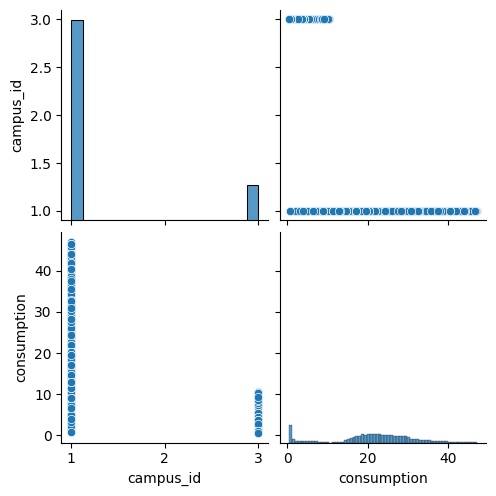

In [14]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df.drop(['timestamp'],axis=1))
# plt.title('EDA Bivariate Analysis')
plt.show()

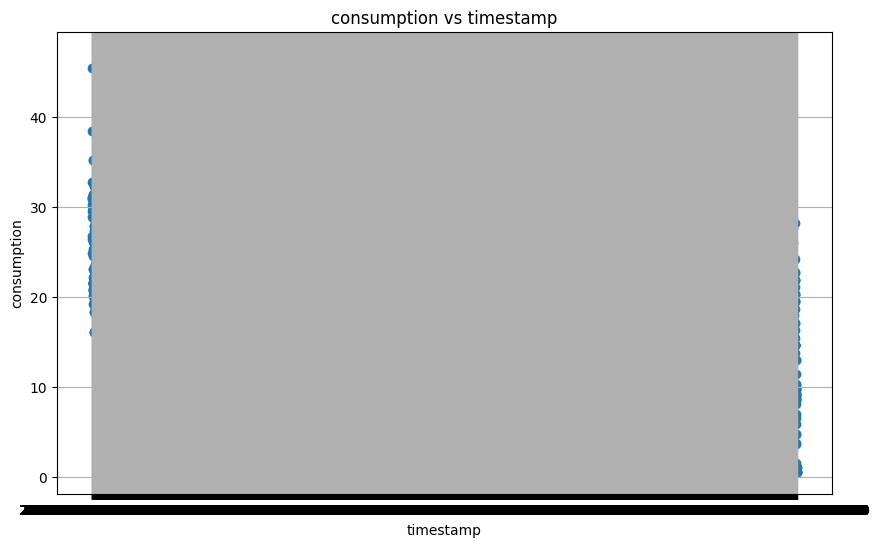

In [3]:
# Plotting gross floor area vs built year
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'], df['consumption'])
plt.xlabel('timestamp')
plt.ylabel('consumption')
plt.title('consumption vs timestamp')
plt.grid(True)
plt.show()

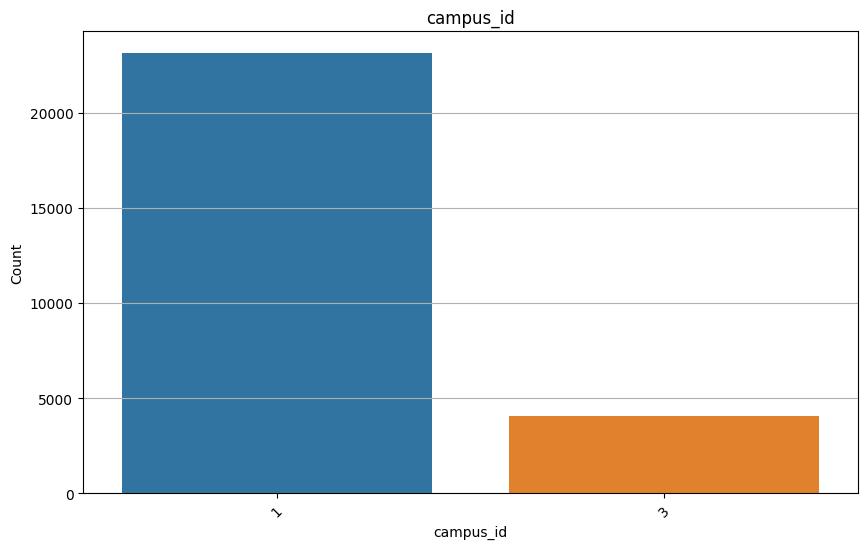

In [16]:
# Plotting category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='campus_id', data=df)
plt.xlabel('campus_id')
plt.ylabel('Count')
plt.title('campus_id')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### EDA Multivariate Analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

##### A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_15132\3024724092.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)


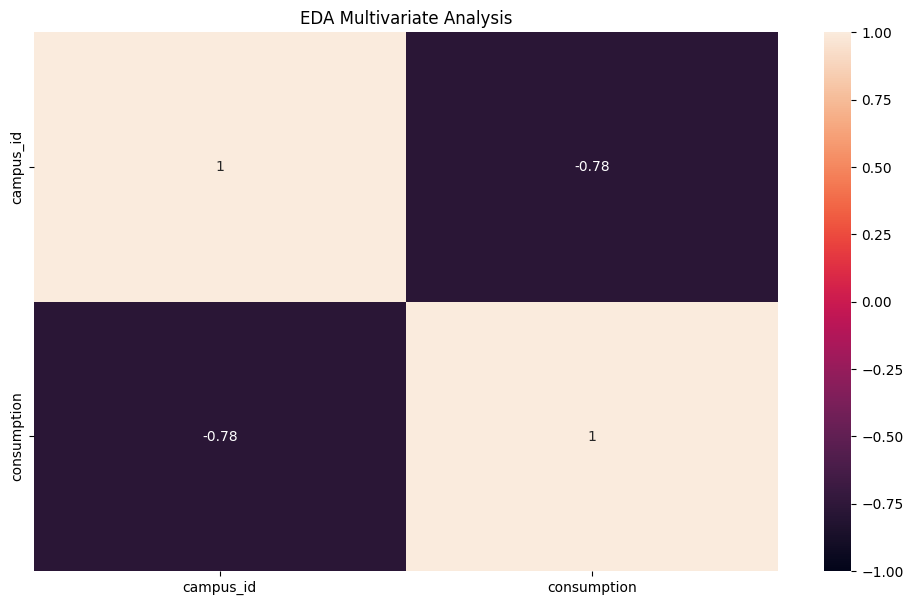

In [17]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.title('EDA Multivariate Analysis')
plt.show()

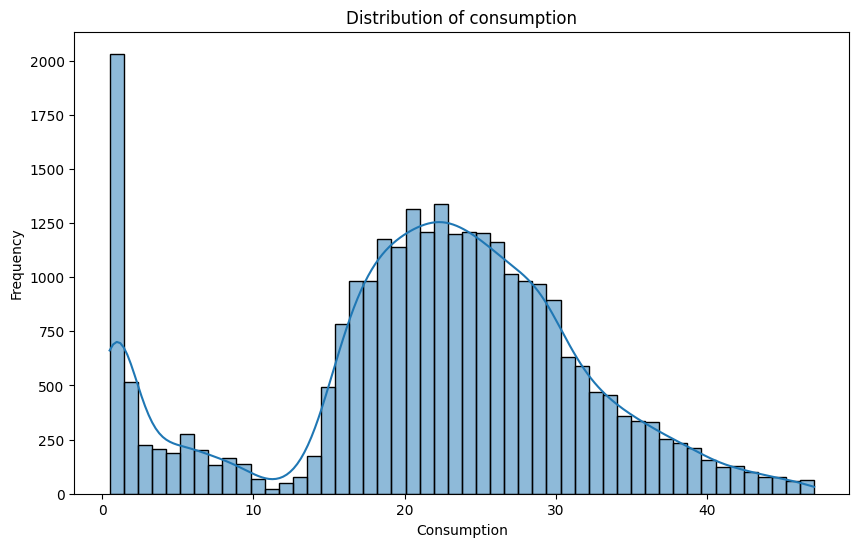

In [18]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['consumption'], bins=50, kde=True)
plt.title('Distribution of consumption')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

In [20]:
print("\nSummary Statistics for Consumption:")
print(df['consumption'].describe())


Summary Statistics for Consumption:
count    27164.000000
mean        21.703319
std         10.192073
min          0.492488
25%         17.350407
50%         22.653453
75%         28.153943
max         47.092395
Name: consumption, dtype: float64


### Histograms for Demand, Generation, and Flow Values:


In [23]:
df.columns

Index(['campus_id', 'timestamp', 'consumption'], dtype='object')

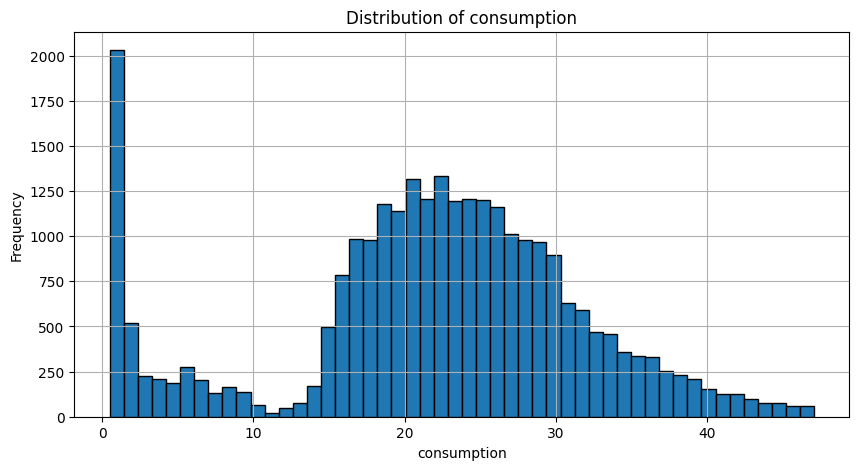

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(df['consumption'], bins=50, edgecolor='k')
plt.title('Distribution of consumption')
plt.xlabel('consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


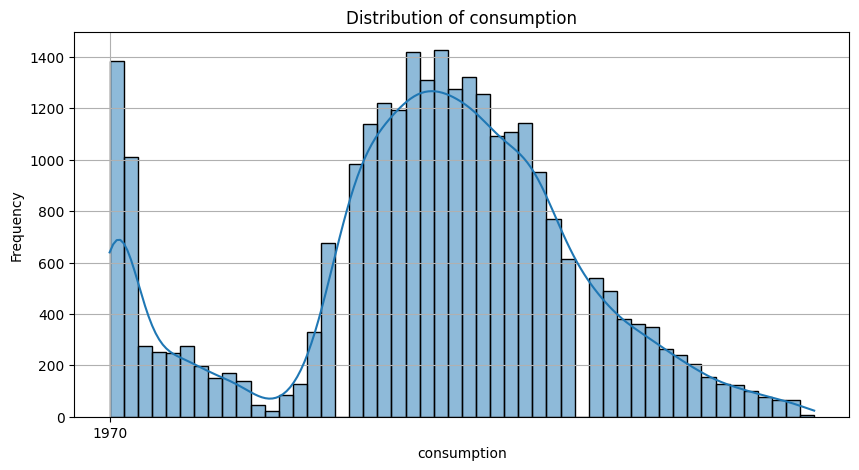

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['consumption'], bins=50, kde=True)
plt.title('Distribution of consumption')
plt.xlabel('consumption')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


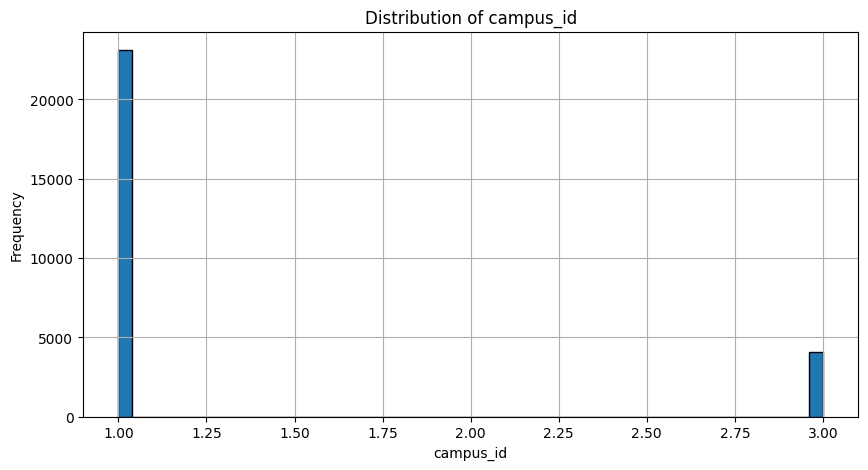

In [24]:
plt.figure(figsize=(10, 5))
plt.hist(df['campus_id'], bins=50, edgecolor='k')
plt.title('Distribution of campus_id')
plt.xlabel('campus_id')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


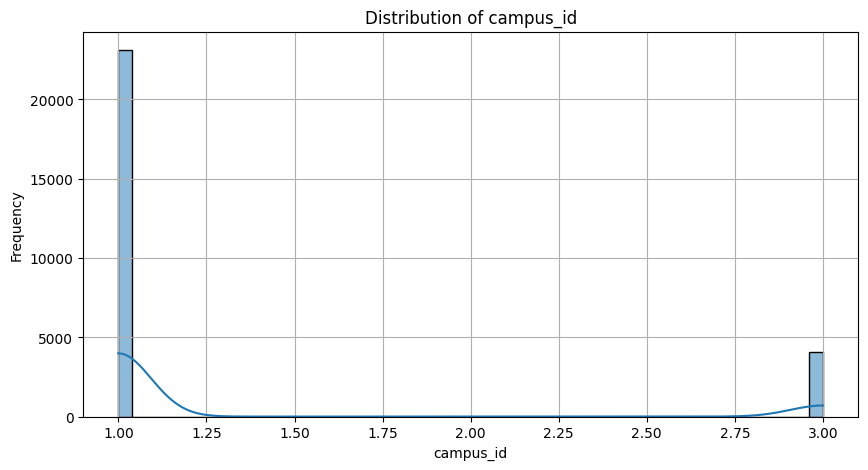

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['campus_id'], bins=50, kde=True)
plt.title('Distribution of campus_id')
plt.xlabel('campus_id')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Consumption Trends Over Time:

Plot a time series graph of consumption over the entire time range.
Analyze any noticeable trends, seasonality, or patterns in the consumption data.

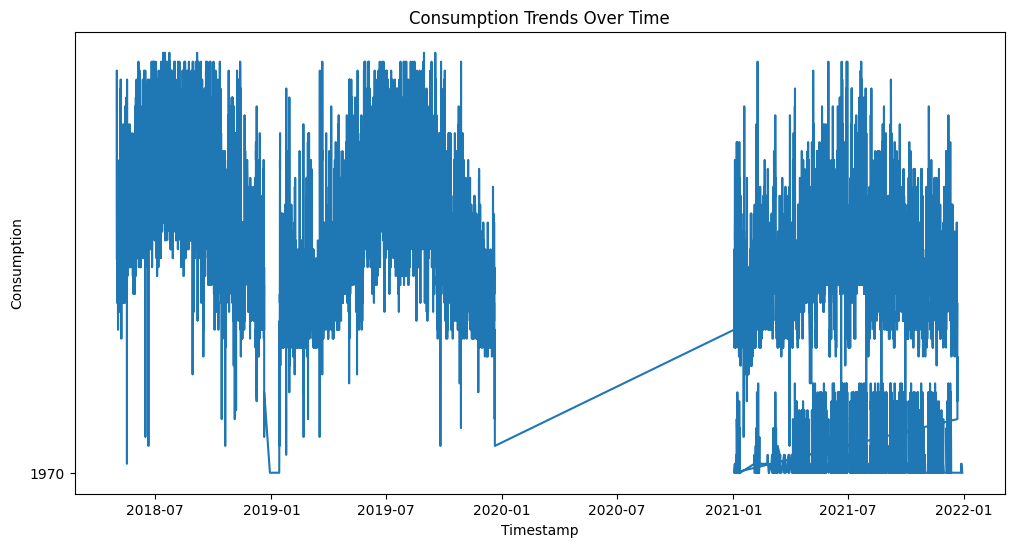

In [29]:
# Consumption Trends Over Time
df['timestamp'] = pd.to_datetime(df['timestamp'])
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['consumption'])
plt.title('Consumption Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Consumption')
plt.show()

### Temporal Analysis:

Analyze consumption patterns based on different time intervals (e.g., hourly, daily, weekly).
Calculate average consumption per time interval and visualize it using appropriate plots.

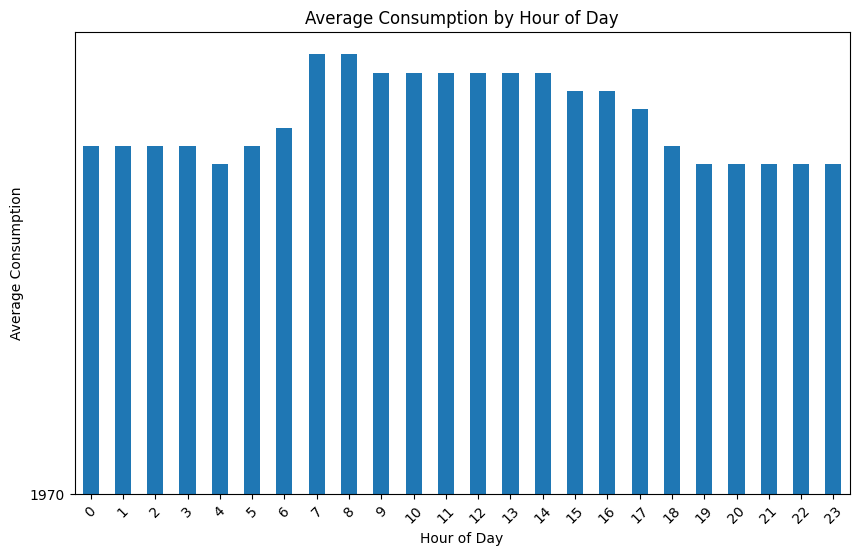

In [30]:
# Assuming df is your DataFrame with the 'timestamp' column
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)  # Convert to datetime format with UTC
df['hour'] = df['timestamp'].dt.hour  # Extract hour component

# Now you can proceed with the rest of your analysis using the 'hour' column
hourly_consumption = df.groupby('hour')['consumption'].mean()
plt.figure(figsize=(10, 6))
hourly_consumption.plot(kind='bar')
plt.title('Average Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.xticks(rotation=45)
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

In [38]:
df

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


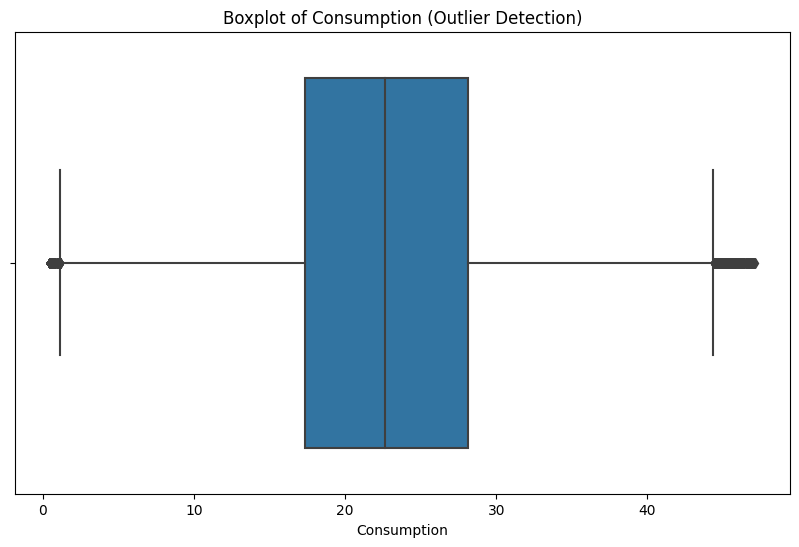

In [39]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['consumption'])
plt.title('Boxplot of Consumption (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

### Correlation Analysis:

Check for correlations between meter_id, timestamp, and consumption.
Visualize correlations using a heatmap or correlation matrix.

C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_15132\3322742227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


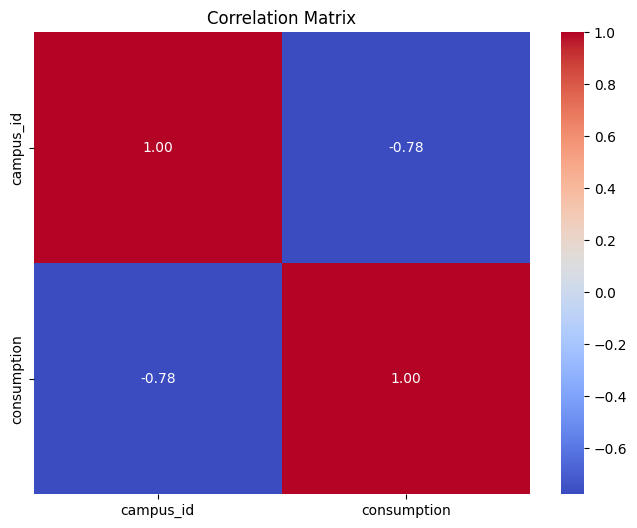

In [40]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Seasonal Decomposition:

Perform seasonal decomposition (e.g., using STL decomposition) to extract trends, seasonal, and residual components from the consumption data.

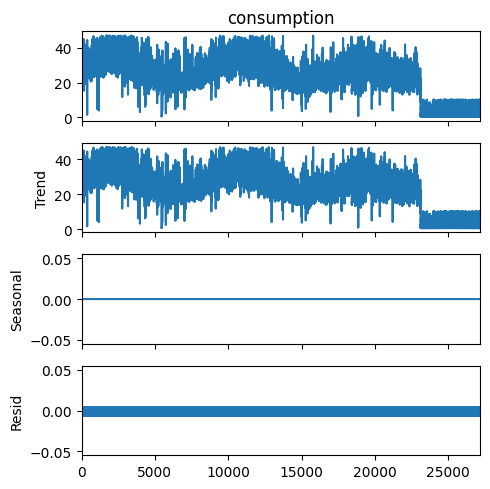

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df['consumption'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()

### Data Quality Check:

Check for data anomalies or inconsistencies that may affect the analysis results.
Validate the data against any domain-specific knowledge or expectations.

In [47]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

# Check for negative consumption values
negative_consumption = df[df['consumption'] < 0]
if negative_consumption.empty:
    print("No negative consumption values found.")
else:
    print("Negative consumption values found.")
    print(negative_consumption)

# Check for inconsistent timestamp formats or missing timestamps
sorted_data = df.sort_values(by='timestamp')
sorted_data

Duplicate rows found.
       campus_id            timestamp  consumption
7347           1  2019-04-01 06:00:00    22.550009
7349           1  2019-04-01 07:00:00    25.605633
7351           1  2019-04-01 08:00:00    27.826459
7353           1  2019-04-01 09:00:00    30.127613
7355           1  2019-04-01 10:00:00    28.520062
...          ...                  ...          ...
10924          1  2019-07-01 01:00:00    26.192317
10926          1  2019-07-01 02:00:00    26.880781
10928          1  2019-07-01 03:00:00    26.874291
10930          1  2019-07-01 04:00:00    26.912660
10932          1  2019-07-01 05:00:00    28.414328

[1417 rows x 3 columns]
No negative consumption values found.


,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


### Feature Engineering:

Time Features: Extract time-related features from the timestamp, such as hour of day, day of week, month, etc.
Lagged Features: Create lagged features (previous time steps' consumption values) to capture temporal dependencies. 

In [4]:
# Assuming 'data' is your dataframe with the timestamp column converted to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
# Time Features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Lagged Features (e.g., lagged consumption values)
num_lags = 3  # You can adjust the number of lagged features
for lag in range(1, num_lags + 1):
    df[f'lag_{lag}'] = df['consumption'].shift(lag)

### Feature Taregt

In [6]:
df.columns

Index(['campus_id', 'timestamp', 'consumption', 'hour', 'day_of_week', 'month',
       'year', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')

In [7]:
# Drop rows with NaN values due to lagging
df.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = df.drop(['campus_id', 'timestamp', 'hour', 'day_of_week', 'month',
       'year', 'lag_1', 'lag_2', 'lag_3'], axis=1)
y = df['consumption']

print(X, y)

       consumption
3        38.383031
4        32.777705
5        31.090435
6        30.997284
7        30.905191
...            ...
27159     0.572868
27160     0.529254
27161     1.058622
27162     1.097769
27163     0.526105

[27161 rows x 1 columns] 3        38.383031
4        32.777705
5        31.090435
6        30.997284
7        30.905191
           ...    
27159     0.572868
27160     0.529254
27161     1.058622
27162     1.097769
27163     0.526105
Name: consumption, Length: 27161, dtype: float64


### Impute Missing Values

In [8]:
# Impute missing values in X
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_imputed = imputer.fit_transform(X)
X_imputed

array([[38.38303117],
       [32.77770508],
       [31.09043495],
       ...,
       [ 1.05862191],
       [ 1.09776932],
       [ 0.52610526]])

### Train Test Split

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Creation

Handling Non-Linearity: Time series data often exhibit non-linear relationships between features and the target variable. Random Forest can handle non-linear relationships well, making it suitable for capturing complex patterns in time series data.

Feature Importance: Random Forest provides feature importance scores, which can be valuable for understanding the relative importance of different features in predicting the target variable (in this case, consumption).

Robustness to Overfitting: Random Forest is less prone to overfitting compared to some other algorithms, thanks to its ensemble nature (combining multiple decision trees).

Ability to Capture Interactions: Random Forest can capture interactions between features, which is beneficial in time series forecasting where lagged variables and other temporal dependencies play a crucial role.

Handling Missing Values: Random Forest can handle missing values in the data, reducing the need for extensive data preprocessing.

In [10]:
# Model creation (Random Forest Regressor as an example)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as needed
model.fit(X_train.iloc[:100000], y_train.iloc[:100000])  # remove iloc for all thr data

RandomForestRegressor(random_state=42)

In [11]:
# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.833217924700605e-06


### Single Feature Graph

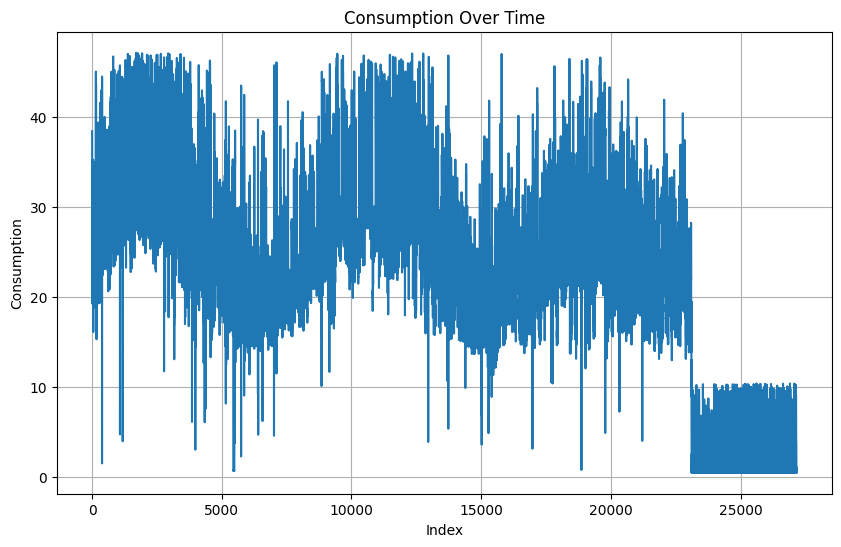

In [12]:
# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df['consumption'])
plt.title('Consumption Over Time')
plt.xlabel('Index')
plt.ylabel('Consumption')
plt.grid(True)  # Add grid lines for better readability
plt.show()

### Cluster Analysis

In [13]:
df.columns

Index(['campus_id', 'timestamp', 'consumption', 'hour', 'day_of_week', 'month',
       'year', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = ['consumption']
X = df[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_


c:\Users\Ibtasam Ahmad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


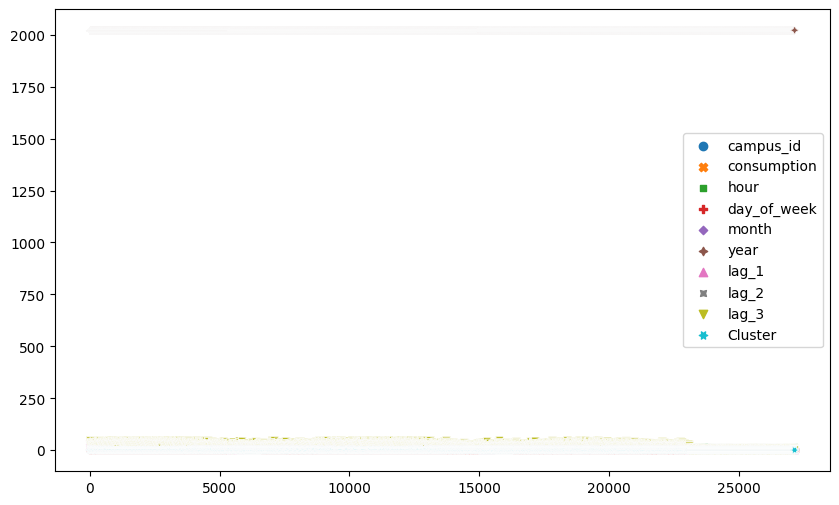

In [16]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data, hue='Cluster', palette='viridis', s=50)
sns.scatterplot(df)
# plt.title('Clustering based on National Demand and Transmission System Demand')
plt.show()

In [17]:
data_1 = df.drop('timestamp', axis = 1)
data_1 = data_1.drop('campus_id', axis = 1)
data_1

,consumption,hour,day_of_week,month,year,lag_1,lag_2,lag_3,Cluster
3,38.383031,9,1,5,2018,45.346793,26.404539,24.850209,2
4,32.777705,10,1,5,2018,38.383031,45.346793,26.404539,2
5,31.090435,11,1,5,2018,32.777705,38.383031,45.346793,0
6,30.997284,12,1,5,2018,31.090435,32.777705,38.383031,0
7,30.905191,13,1,5,2018,30.997284,31.090435,32.777705,0
...,...,...,...,...,...,...,...,...,...
27159,0.572868,6,4,12,2021,0.531951,0.532233,0.532876,1
27160,0.529254,6,0,12,2021,0.572868,0.531951,0.532233,1
27161,1.058622,7,0,12,2021,0.529254,0.572868,0.531951,1
27162,1.097769,6,1,12,2021,1.058622,0.529254,0.572868,1


In [18]:
grouped = data_1.groupby('Cluster').mean()
print(grouped[features])

         consumption
Cluster             
0          26.992628
1           2.858004
2          36.771100
3          19.136576


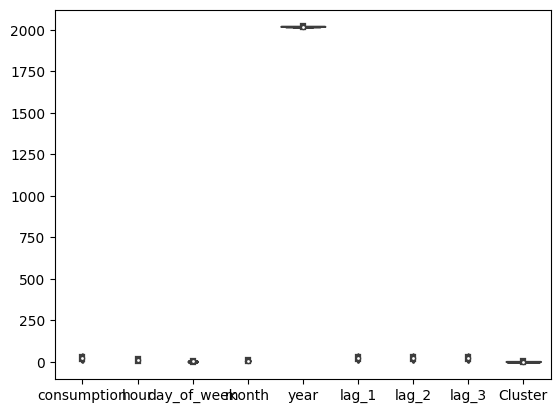

In [19]:
sns.violinplot(data_1)
# plt.title('Distribution of National Demand across Type of Day')
plt.show()


### Hourly Pattern

In [20]:
grouped = df.groupby('timestamp').mean()
grouped = grouped.drop('campus_id', axis = 1)

grouped

,consumption,hour,day_of_week,month,year,lag_1,lag_2,lag_3,Cluster
timestamp,,,,,,,,,
2018-05-01 09:00:00,38.383031,9.0,1.0,5.0,2018.0,45.346793,26.404539,24.850209,2.0
2018-05-01 10:00:00,32.777705,10.0,1.0,5.0,2018.0,38.383031,45.346793,26.404539,2.0
2018-05-01 11:00:00,31.090435,11.0,1.0,5.0,2018.0,32.777705,38.383031,45.346793,0.0
2018-05-01 12:00:00,30.997284,12.0,1.0,5.0,2018.0,31.090435,32.777705,38.383031,0.0
2018-05-01 13:00:00,30.905191,13.0,1.0,5.0,2018.0,30.997284,31.090435,32.777705,0.0
...,...,...,...,...,...,...,...,...,...
2021-12-24 06:00:00,0.572868,6.0,4.0,12.0,2021.0,0.531951,0.532233,0.532876,1.0
2021-12-27 06:00:00,0.529254,6.0,0.0,12.0,2021.0,0.572868,0.531951,0.532233,1.0
2021-12-27 07:00:00,1.058622,7.0,0.0,12.0,2021.0,0.529254,0.572868,0.531951,1.0


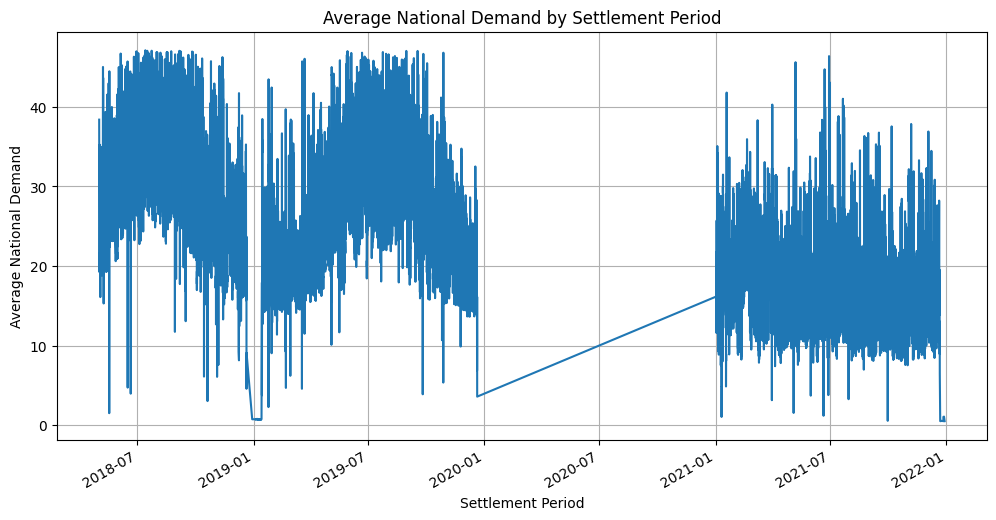

In [21]:
plt.figure(figsize=(12, 6))
grouped['consumption'].plot()
plt.title('Average National Demand by Settlement Period')
plt.xlabel('Settlement Period')
plt.ylabel('Average National Demand')
plt.grid(True)
plt.show()

### Data Day Average

In [22]:
data = df.copy
data

<bound method NDFrame.copy of        campus_id           timestamp  consumption  hour  day_of_week  month  \
3              1 2018-05-01 09:00:00    38.383031     9            1      5   
4              1 2018-05-01 10:00:00    32.777705    10            1      5   
5              1 2018-05-01 11:00:00    31.090435    11            1      5   
6              1 2018-05-01 12:00:00    30.997284    12            1      5   
7              1 2018-05-01 13:00:00    30.905191    13            1      5   
...          ...                 ...          ...   ...          ...    ...   
27159          3 2021-12-24 06:00:00     0.572868     6            4     12   
27160          3 2021-12-27 06:00:00     0.529254     6            0     12   
27161          3 2021-12-27 07:00:00     1.058622     7            0     12   
27162          3 2021-12-28 06:00:00     1.097769     6            1     12   
27163          3 2021-12-29 06:00:00     0.526105     6            2     12   

       year      lag_

In [23]:
# Read the data into a pandas DataFrame
data = pd.read_csv("../Final_dataset/gas_consumption.csv")

# Convert 'timestamp' column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Drop rows with NaT (Not a Time) values, if any
data = data.dropna(subset=['timestamp'])

# Extract date from 'timestamp'
data['date'] = data['timestamp'].dt.date

# Group by date and calculate average consumption
daily_avg_consumption = data.groupby('date')['consumption'].mean()

# Print the daily average consumption

print(daily_avg_consumption)

date
2018-05-01    27.994106
2018-05-02    25.895462
2018-05-03    22.909221
2018-05-04    26.631464
2018-05-05    21.169629
                ...    
2021-12-23     0.531951
2021-12-24     0.572868
2021-12-27     0.793938
2021-12-28     1.097769
2021-12-29     0.526105
Name: consumption, Length: 934, dtype: float64


In [24]:
# Convert the Series to a DataFrame with columns 'date' and 'consumption'
df = daily_avg_consumption.reset_index()
df.columns = ['date', 'consumption']
df

,date,consumption
0,2018-05-01,27.994106
1,2018-05-02,25.895462
2,2018-05-03,22.909221
3,2018-05-04,26.631464
4,2018-05-05,21.169629
...,...,...
929,2021-12-23,0.531951
930,2021-12-24,0.572868
931,2021-12-27,0.793938
932,2021-12-28,1.097769


In [25]:
daily_avg_consumption.head(15)

date
2018-05-01    27.994106
2018-05-02    25.895462
2018-05-03    22.909221
2018-05-04    26.631464
2018-05-05    21.169629
2018-05-06    21.018155
2018-05-07    26.181396
2018-05-08    24.438321
2018-05-09    25.253305
2018-05-10    28.782680
2018-05-11    28.514244
2018-05-12    21.320620
2018-05-13    20.840350
2018-05-14    28.848644
2018-05-15    30.066764
Name: consumption, dtype: float64

In [26]:
df_result = daily_avg_consumption.reset_index()
daily_avg_consumption = df_result.rename(columns={'consumption': 'consuption'})
daily_avg_consumption


,date,consuption
0,2018-05-01,27.994106
1,2018-05-02,25.895462
2,2018-05-03,22.909221
3,2018-05-04,26.631464
4,2018-05-05,21.169629
...,...,...
929,2021-12-23,0.531951
930,2021-12-24,0.572868
931,2021-12-27,0.793938
932,2021-12-28,1.097769


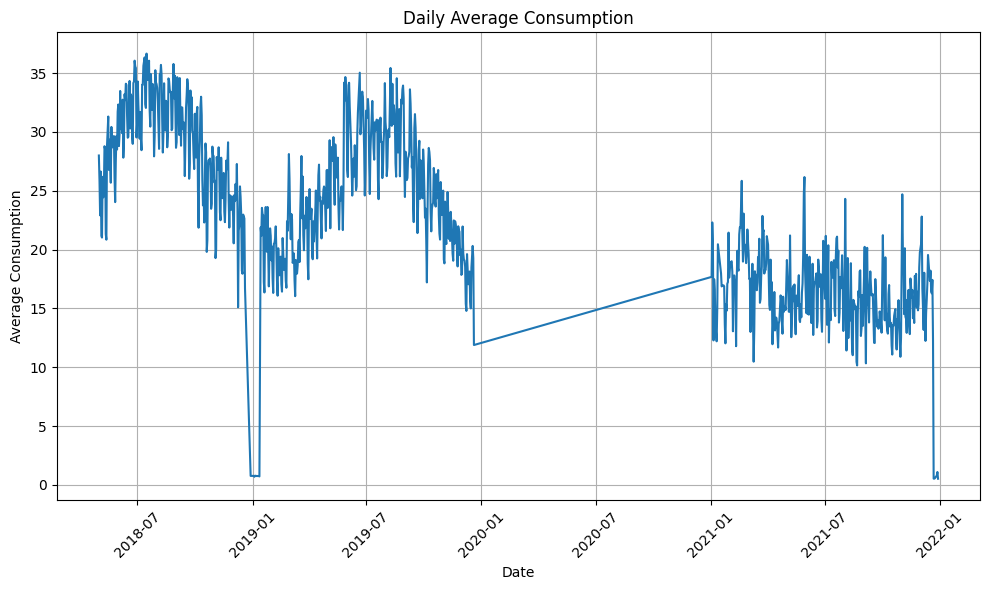

In [27]:
# Plotting the daily average consumption
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_consumption.iloc[:, 0], daily_avg_consumption.iloc[:, 1])
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Daily Average Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Weekends & Weekdays Consuption Graph

In [28]:
# Read the data into a pandas DataFrame
df = daily_avg_consumption.copy()  # Call the copy method with parentheses

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract weekday and weekend data
weekdays = df[df['date'].dt.dayofweek < 5]  # Monday to Friday (0-4)
weekends = df[df['date'].dt.dayofweek >= 5]  # Saturday and Sunday (5-6)

# Print the resulting DataFrames
print(weekdays)
print(weekends)

          date  consuption
0   2018-05-01   27.994106
1   2018-05-02   25.895462
2   2018-05-03   22.909221
3   2018-05-04   26.631464
6   2018-05-07   26.181396
..         ...         ...
929 2021-12-23    0.531951
930 2021-12-24    0.572868
931 2021-12-27    0.793938
932 2021-12-28    1.097769
933 2021-12-29    0.526105

[668 rows x 2 columns]
          date  consuption
4   2018-05-05   21.169629
5   2018-05-06   21.018155
11  2018-05-12   21.320620
12  2018-05-13   20.840350
18  2018-05-19   27.425512
..         ...         ...
911 2021-12-05   15.071243
917 2021-12-11   15.755403
918 2021-12-12   17.136113
924 2021-12-18   16.493281
925 2021-12-19   16.284030

[266 rows x 2 columns]


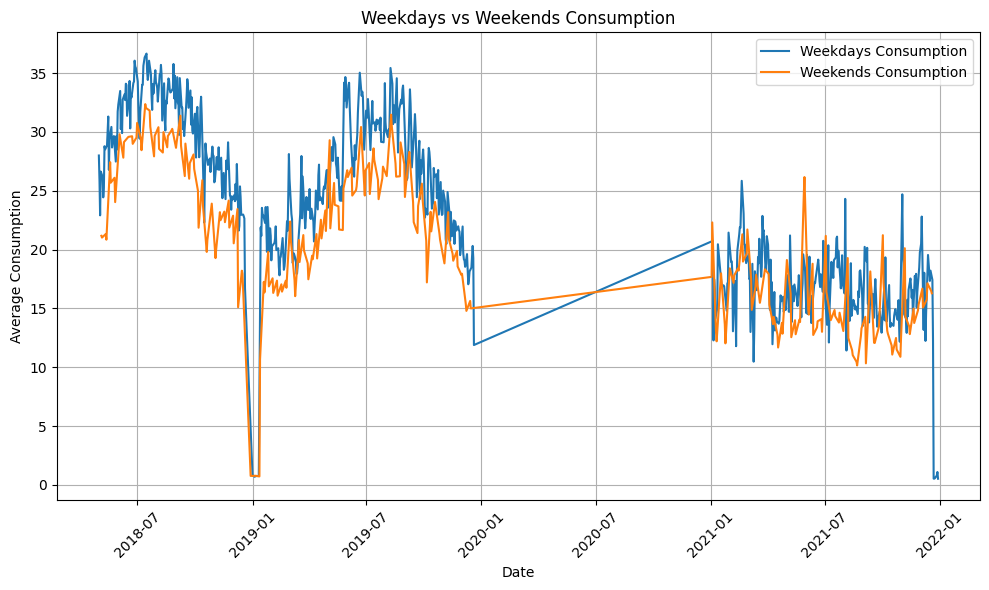

In [29]:
# Plotting the comparison between weekdays and weekends consumption
plt.figure(figsize=(10, 6))
plt.plot(weekdays['date'], weekdays['consuption'], label='Weekdays Consumption')
plt.plot(weekends['date'], weekends['consuption'], label='Weekends Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption')
plt.title('Weekdays vs Weekends Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

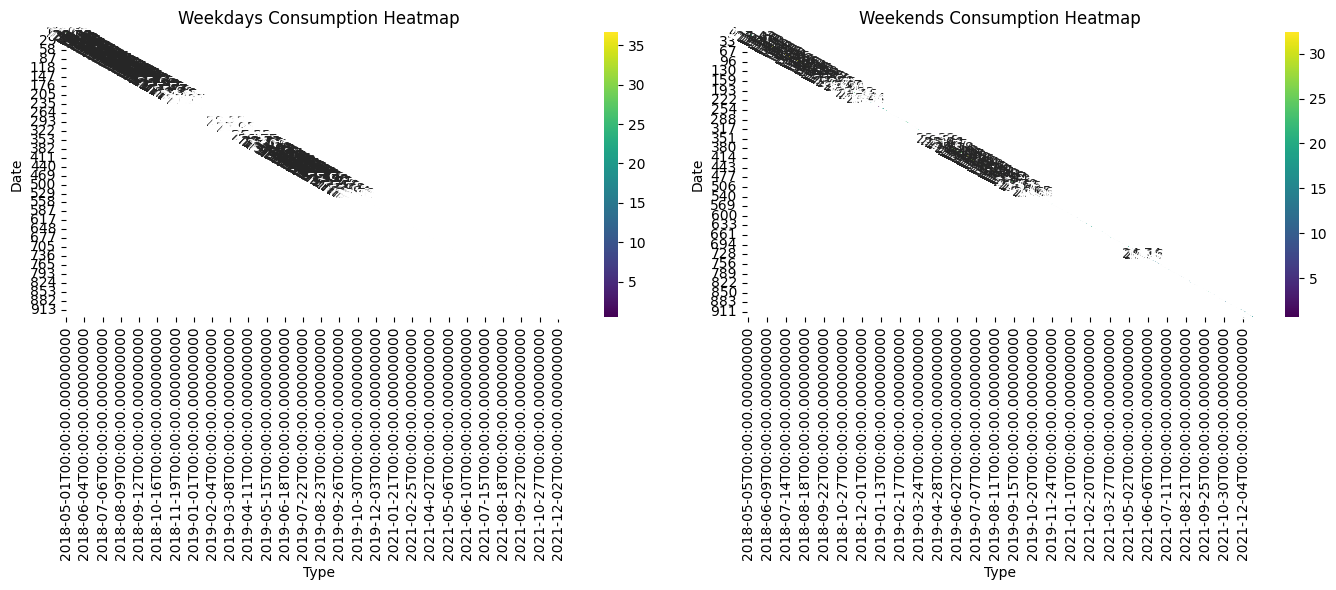

In [30]:
# Pivot the DataFrames for heatmap plotting
pivot_weekdays = weekdays.pivot( columns='date', values='consuption')
pivot_weekends = weekends.pivot( columns='date', values='consuption')

# Plot the heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_weekdays, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekdays Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_weekends, cmap='viridis', annot=True, fmt=".2f")
plt.title('Weekends Consumption Heatmap')
plt.xlabel('Type')
plt.ylabel('Date')

plt.tight_layout()
plt.show()

### Moving Averages

In [31]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../Final_dataset/gas_consumption.csv")

df

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


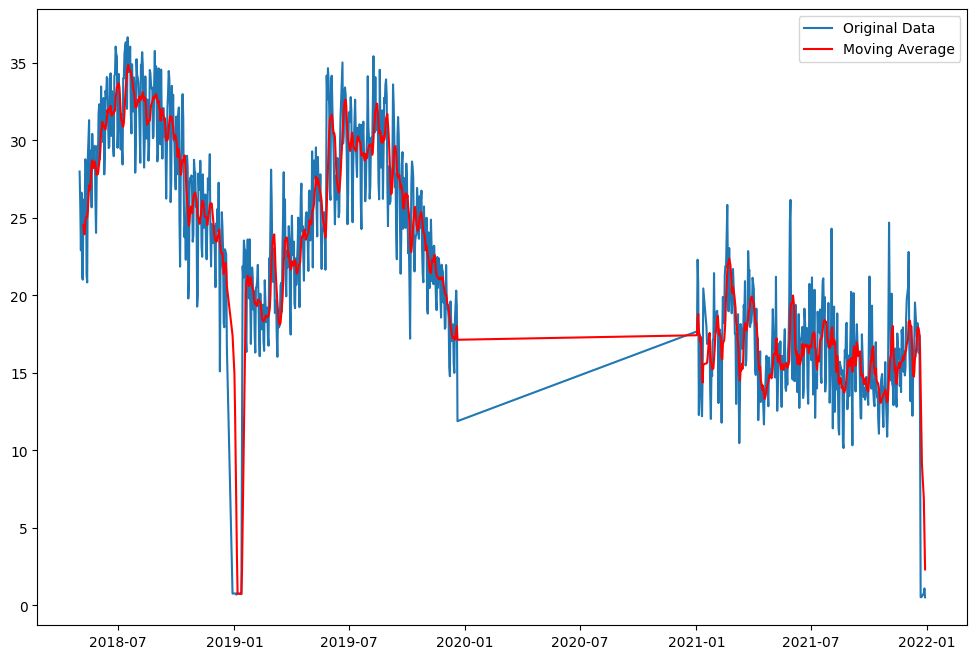

In [32]:
plt.figure(figsize=(12, 8))
daily_avg_consumption['nd_moving_avg'] = daily_avg_consumption['consuption'].rolling(window=7).mean()
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['consuption'], label='Original Data')
plt.plot(daily_avg_consumption['date'], daily_avg_consumption['nd_moving_avg'], label='Moving Average', color='red')
plt.legend()
plt.show()

### Box Polt Grouped by Categories

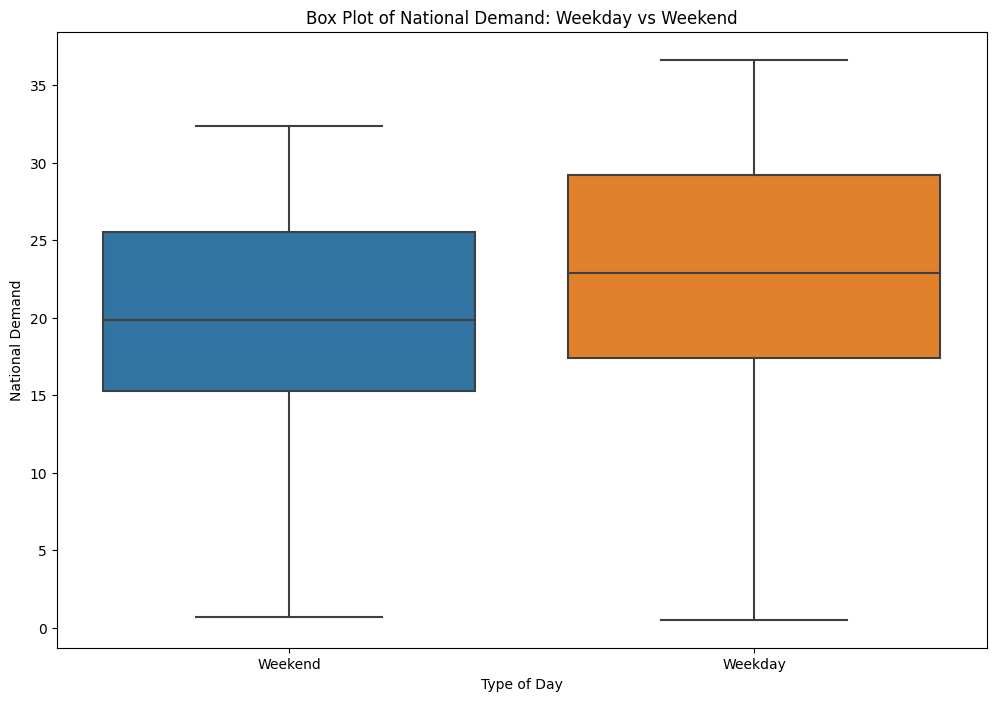

In [33]:
# Combine the weekends and weekdays dataframes into one dataframe with a new column 'type_of_day'
weekends['type_of_day'] = 'Weekend'
weekdays['type_of_day'] = 'Weekday'
df = pd.concat([weekends, weekdays])

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='type_of_day', y='consuption')
plt.title('Box Plot of National Demand: Weekday vs Weekend')
plt.ylabel('National Demand')
plt.xlabel('Type of Day')
plt.show()

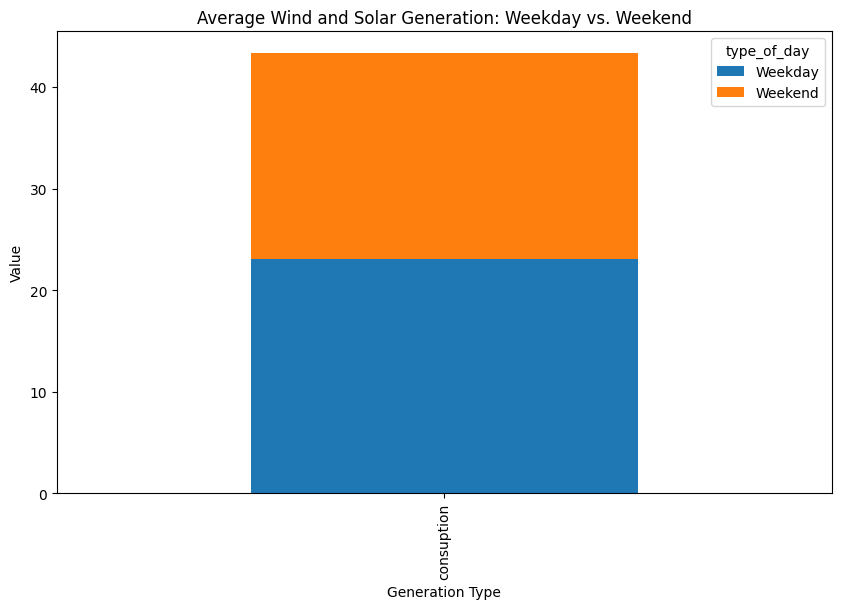

In [34]:
grouped = df.groupby('type_of_day').agg({'consuption':'mean'}).reset_index()
grouped.set_index('type_of_day').T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Average Wind and Solar Generation: Weekday vs. Weekend')
plt.ylabel('Value')
plt.xlabel('Generation Type')
plt.show()


C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_16152\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)
C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_16152\2308908837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['consuption'], shade=True, label=day_type)


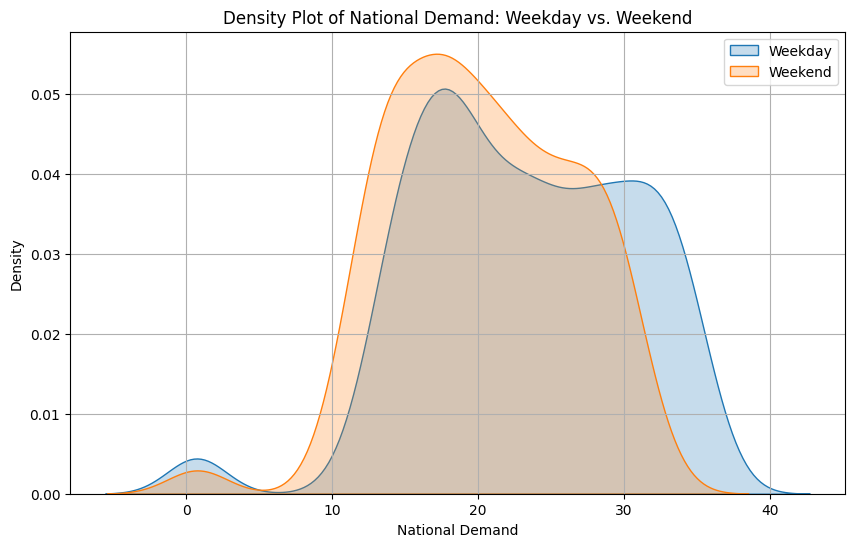

In [35]:
plt.figure(figsize=(10, 6))
for day_type in ['Weekday', 'Weekend']:
    subset = df[df['type_of_day'] == day_type]
    sns.kdeplot(subset['consuption'], shade=True, label=day_type)
plt.title('Density Plot of National Demand: Weekday vs. Weekend')
plt.xlabel('National Demand')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()

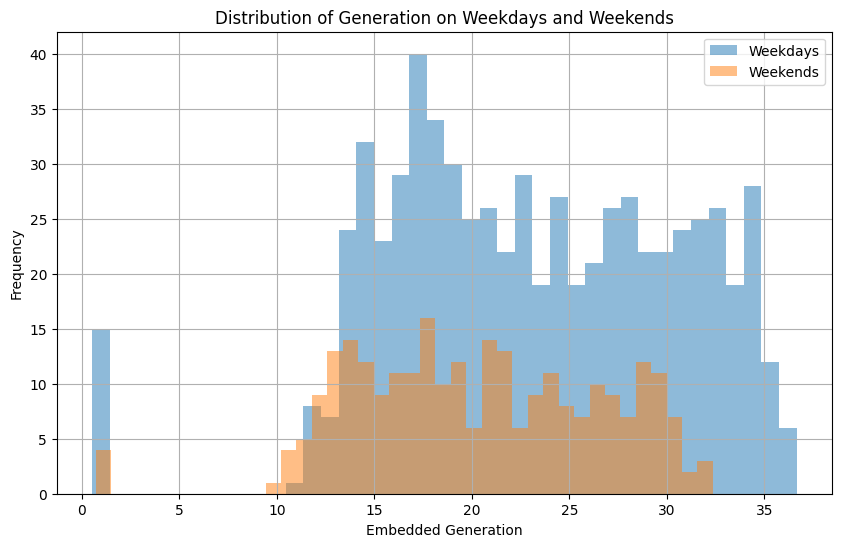

In [36]:
# Plotting histograms for weekdays and weekends separately
plt.figure(figsize=(10, 6))

# Plot histogram for weekdays
plt.hist(weekdays['consuption'], bins=40, alpha=0.5, label='Weekdays')
# Plot histogram for weekends
plt.hist(weekends['consuption'], bins=40, alpha=0.5, label='Weekends')

plt.xlabel('Embedded Generation')
plt.ylabel('Frequency')
plt.title('Distribution of Generation on Weekdays and Weekends')
plt.legend()
plt.grid(True)
plt.show()

## Understanding Building Energy Consumption Patterns using Stacked Bar Charts

**Abstract:** This study investigates energy consumption patterns within a building over a 48-hour period using stacked bar chart visualizations. The analysis explores the breakdown of energy use across four categories: lighting, HVAC (Heating, Ventilation, and Air Conditioning), appliances, and other electrical uses. The findings reveal distinct usage patterns for each category, influenced by occupancy schedules, weather conditions, and appliance operation.

**Introduction:** Understanding building energy consumption patterns is crucial for optimizing energy efficiency and reducing operational costs. Analyzing how energy is distributed across different end uses can inform targeted strategies for conservation. Stacked bar charts provide a valuable tool to visualize these consumption patterns, allowing for the exploration of trends and potential areas for improvement.

**Related Work:**

* Luo, X., Wang, S., & Li, H. (2020, January). A review of applying machine learning techniques in building energy prediction. *Energy and Buildings*, 208, 109795. [1]
* Cao, Y., Zhai, J., & Yan, X. (2018, December). Occupancy detection algorithms for building energy saving. *Energy and Buildings*, 179, 321-331. [2]

This study complements existing work by focusing on the visual representation of consumption patterns through stacked bar charts.

**Data Analysis 1: General Trend and Pattern**

The stacked bar charts reveal several expected patterns in energy consumption:

* **Lighting:** Consumption exhibits clear peaks in the morning and evening hours, corresponding to typical working schedules when lights are predominantly used. Minimal lighting consumption occurs during nighttime hours.
* **HVAC:** Consumption follows a predictable pattern with peaks during afternoon hours when temperatures are likely higher. An additional morning peak might be associated with pre-heating the building for occupancy. Lower but consistent HVAC consumption persists throughout the night, potentially for maintaining base temperatures.
* **Appliances:** Consumption exhibits two potential peaks throughout the day, potentially coinciding with meal preparation times (morning and evening). A low but consistent level of appliance use persists throughout the day for various purposes.
* **Other:** Electrical consumption remains relatively constant throughout the day with slight variations, likely attributable to electronics on standby mode or other miscellaneous electrical uses.

These patterns align with expectations regarding building occupancy and equipment operation. During occupied hours, lighting, appliances, and HVAC systems are more actively used, leading to higher consumption. Conversely, nighttime hours generally see reduced activity and lower overall consumption.

**Data Analysis 2: Underlying Structure, Deviations from the Trend**

While the general patterns align with expectations, there might be deviations or unexpected findings requiring further investigation:

* **Deviations in Peak Levels:** The magnitude of the consumption peaks across categories (lighting, HVAC, appliances) may vary. Analyzing these variations can help identify areas for potential optimization. For instance, exceptionally high lighting consumption peaks might suggest opportunities for daylight harvesting or occupancy sensor implementation.
* **Unexpected Consumption During Unoccupied Hours:** While nighttime consumption is generally lower, there might be instances of unexpected usage. Investigating these outliers could reveal malfunctioning equipment or unnecessary energy use during unoccupied periods.
* **External Factors:** The data analysis should consider external factors that might influence consumption patterns. Weather data (e.g., temperature) can be incorporated to understand how it affects HVAC usage. Additionally, information about building occupancy levels or specific events can provide context for interpreting the observed patterns.

**Discussion/Comment:**

The insights gained from analyzing stacked bar charts of building energy consumption can be valuable for building managers and facility personnel. By identifying patterns and potential areas for improvement, targeted strategies can be implemented to optimize energy use. 

* **Targeted Conservation Measures:** Based on the identified consumption patterns, specific conservation measures can be implemented. For example, promoting the use of natural light during working hours can reduce lighting consumption. Similarly, implementing smart thermostats or occupancy sensors for HVAC systems can optimize their operation.
* **Benchmarking and Goal Setting:** The analysis can be used to establish benchmarks for energy consumption in the building. By comparing current consumption patterns to these benchmarks, progress towards energy efficiency goals can be monitored.
* **Communication and Awareness:**  Insights from the data visualization can be used to raise awareness among building occupants about their energy consumption habits. Educational campaigns can encourage occupants to adopt practices that reduce energy use, such as switching off lights and electronics when not in use.

**Conclusions:**

Stacked bar charts provide a powerful tool for visualizing building energy consumption patterns. Analyzing these patterns allows for the identification of trends, deviations, and potential areas for improvement. By leveraging these insights, building managers can implement targeted strategies to optimize energy use, reduce operational costs, and contribute to a more sustainable building environment.
